In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#주피터에서 실행결과 여러줄 보여주고싶을때
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#폰트 확인인

import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')

f = [f.name for f in fm.fontManager.ttflist]
print(f'{f} \n')

# 한글 폰트 경로 설정 (예: 맑은 고딕)
font_path = r'C:\Windows\Fonts\malgun.ttf'  # Windows 기준
font_prop = fm.FontProperties(fname=font_path)

# 폰트 설정 적용
plt.rcParams['font.family'] = font_prop.get_name()

['cmsy10', 'cmr10', 'DejaVu Sans', 'cmex10', 'STIXSizeThreeSym', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXSizeTwoSym', 'DejaVu Sans', 'STIXSizeFourSym', 'cmtt10', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmmi10', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif Display', 'DejaVu Sans', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXNonUnicode', 'cmss10', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXGeneral', 'STIXGeneral', 'STIXSizeFiveSym', 'cmb10', 'STIXNonUnicode', 'SimSun', 'Georgia', 'Harlow Solid Italic', 'Tw Cen MT Condensed', 'Candara', 'Tw Cen MT', 'Segoe UI', 'Bernard MT Condensed', 'MS Reference Sans Serif', 'Calisto MT', 'Arial', 'HCR Dotum Ext', 'Informal Roman', 'Palatino Linotype', 'Freestyle Script', 'Segoe Fluent Icons', 'Arial', 'Leelawadee UI', 'Book Antiqua', 'Arial', 'Material Design Icons', 'Californian FB', 'Georgia',

In [3]:
#서울시 인구 데이터 파일 로드
s_people = pd.read_excel('./seoulPopulation.xlsx')
s_people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [4]:
#서울시 CCTV데이터 파일 로드
s_cctv=pd.read_csv('./seoulCCTV.csv')
s_cctv.head(10)


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


<Figure size 600x600 with 0 Axes>

<BarContainer object of 25 artists>

Text(0.5, 1.0, '구별 CCTV 현황')

Text(0.5, 0, 'CCTV 대수')

Text(0, 0.5, '구 이름')

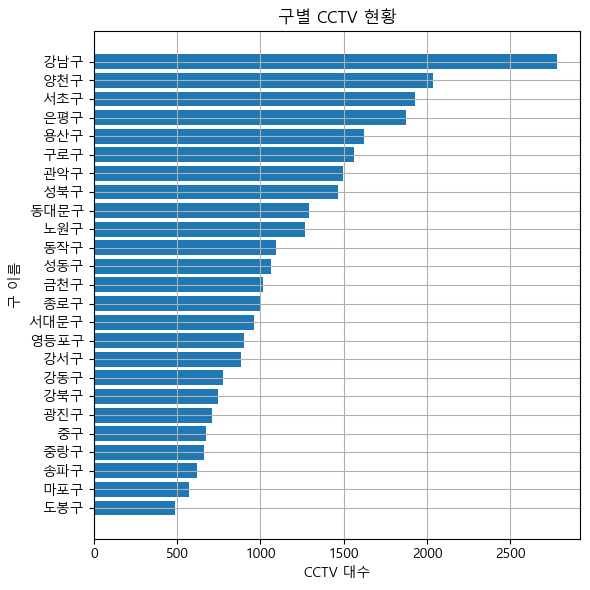

In [5]:
gu_cctv = s_cctv.iloc[:, :2]

# 데이터를 '소계' 기준으로 내림차순 정렬
gu_cctv = gu_cctv.sort_values(by='소계')

label = []
values = []
for i in range(len(gu_cctv.values)):
  label.append(gu_cctv.values[i][0])
  values.append(gu_cctv.values[i][1])

plt.figure(figsize=(6,6))

plt.barh(label,values)
plt.title('구별 CCTV 현황')
plt.xlabel('CCTV 대수')
plt.ylabel('구 이름')
plt.grid()
plt.tight_layout()
plt.savefig('./1번_지역구별 CCTV 현황')
plt.show()


In [6]:
#인구수 대비 CCTV설치 대수

s_people.head()


s_people_p = s_people.iloc[3:,[1,3]].reset_index(drop=True)
s_people_p
merged_data=gu_cctv.merge(s_people_p, left_on='기관명', right_on='자치구')
merged_data

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


,자치구,인구
0,종로구,162820
1,중구,133240
2,용산구,244203
3,성동구,311244
4,광진구,372164
5,동대문구,369496
6,중랑구,414503
7,성북구,461260
8,강북구,330192
9,도봉구,348646


,기관명,소계,자치구,인구
0,도봉구,485,도봉구,348646
1,마포구,574,마포구,389649
2,송파구,618,송파구,667483
3,중랑구,660,중랑구,414503
4,중구,671,중구,133240
5,광진구,707,광진구,372164
6,강북구,748,강북구,330192
7,강동구,773,강동구,453233
8,강서구,884,강서구,603772
9,영등포구,904,영등포구,402985


In [192]:
merged_data=gu_cctv.merge(s_people_p, left_on='기관명', right_on='자치구')
prep_data = merged_data.iloc[:,1] / merged_data.iloc[:,3]*100
merged_data.insert(4,'인구대비CCTV비율',prep_data)
merged_data=merged_data.sort_values(by='인구대비CCTV비율')
merged_data

,기관명,소계,자치구,인구,인구대비CCTV비율
2,송파구,618,송파구,667483,0.092587
0,도봉구,485,도봉구,348646,0.13911
8,강서구,884,강서구,603772,0.146413
1,마포구,574,마포구,389649,0.147312
3,중랑구,660,중랑구,414503,0.159227
7,강동구,773,강동구,453233,0.170552
5,광진구,707,광진구,372164,0.18997
15,노원구,1265,노원구,569384,0.22217
9,영등포구,904,영등포구,402985,0.224326
6,강북구,748,강북구,330192,0.226535


<Figure size 600x600 with 0 Axes>

<BarContainer object of 25 artists>

Text(0.5, 1.0, '구별 인구대비 CCTV설치 비율')

Text(0.5, 0, '비율')

Text(0, 0.5, '구 이름')

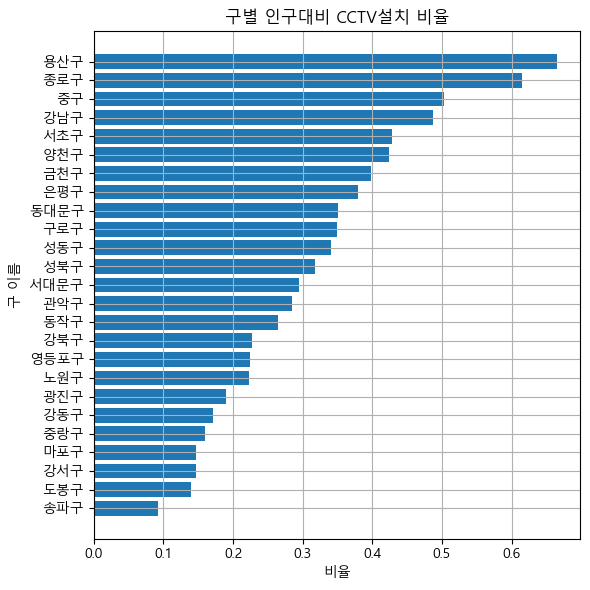

In [8]:
c_label = merged_data['기관명'].tolist()
result = merged_data['인구대비CCTV비율'].tolist()

plt.figure(figsize=(6,6))
plt.barh(c_label, result)
plt.title('구별 인구대비 CCTV설치 비율')
plt.xlabel('비율')
plt.ylabel('구 이름')
plt.grid()
plt.tight_layout()
plt.savefig('./2번_지역구별 인구대비 CCTV설치 비율')
plt.show()

In [77]:
merged_data = merged_data.sort_values(by='기관명')

<Figure size 700x600 with 0 Axes>

Text(0.5, 1.0, '인구 별 CCTV 분포')

Text(0.5, 0, '인구 수')

Text(0, 0.5, 'CCTV 수')

(66620.0, 734231.3)

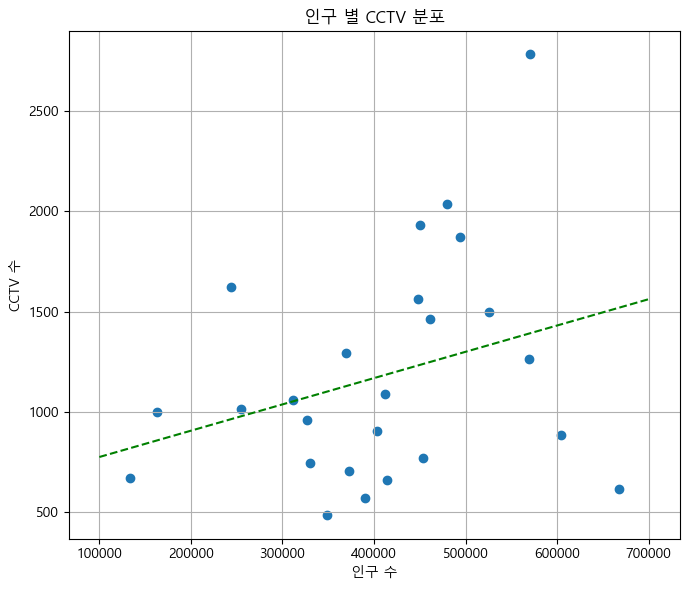

In [78]:
merged_data = merged_data.sort_values(by='기관명')

d_label = merged_data['소계'].tolist()
d_row = merged_data['인구'].tolist()

#그래프에 최소 최댓값 설정을 위해 형 변환
# d_value = [int(v) for v in d_row]

#회귀선
#기울기, y절편 = np.polyfit(데이터x, 데이터y, 1(차원=직선))
x,y = np.polyfit(d_row,d_label,1) #기울기x, y절편

#회귀선을 그릴때 x축의 최대,최소만 알고있어도 그릴수 있음
#최대,최소값으로 두 점 생성
x_reg = np.array([100000, 700000])

#회귀선 y값 계산 => 기울기*x값 + y절편
y_reg = x*x_reg+y


plt.figure(figsize=(7,6))
plt.plot(x_reg,y_reg, '--' ,color = 'green' )
plt.title('인구 별 CCTV 분포')
plt.xlabel('인구 수')
plt.ylabel('CCTV 수')
plt.scatter(d_row,d_label)
plt.grid()
plt.xlim(min(d_row)*0.5, max(d_row)*1.1)

plt.tight_layout()
plt.savefig('./3번_인구별 CCTV 분포와 회귀선')
plt.show()

In [107]:
merged_data = merged_data.sort_values(by='기관명')

d_label = merged_data['소계'].tolist()
d_row = merged_data['인구'].tolist()

#회귀선
#기울기, y절편 = np.polyfit(데이터x, 데이터y, 1(차원=직선))
x,y = np.polyfit(d_row,d_label,1) #기울기x, y절편

#회귀선을 그릴때 x축의 최대,최소만 알고있어도 그릴수 있음
#최대,최소값으로 두 점 생성
x_reg = np.array([100000, 700000])
#회귀선 y값 계산 => 기울기*x값 + y절편
y_reg = x*x_reg+y

<Figure size 900x500 with 0 Axes>

Text(0.5, 1.0, '인구 별 CCTV 분포')

Text(0.5, 0, '인구 수')

Text(0, 0.5, 'CCTV 수')

(66620.0, 734231.3)

Text(4, -4, '강남구')

Text(4, -4, '강동구')

Text(4, -4, '강북구')

Text(4, -4, '강서구')

Text(4, -4, '관악구')

Text(4, -4, '광진구')

Text(4, -4, '구로구')

Text(4, -4, '금천구')

Text(4, -4, '노원구')

Text(4, -4, '도봉구')

Text(4, -4, '동대문구')

Text(4, -4, '동작구')

Text(4, -4, '마포구')

Text(4, -4, '서대문구')

Text(4, -4, '서초구')

Text(4, -4, '성동구')

Text(4, -4, '성북구')

Text(4, -4, '송파구')

Text(4, -4, '양천구')

Text(4, -4, '영등포구')

Text(4, -4, '용산구')

Text(4, -4, '은평구')

Text(4, -4, '종로구')

Text(4, -4, '중구')

Text(4, -4, '중랑구')

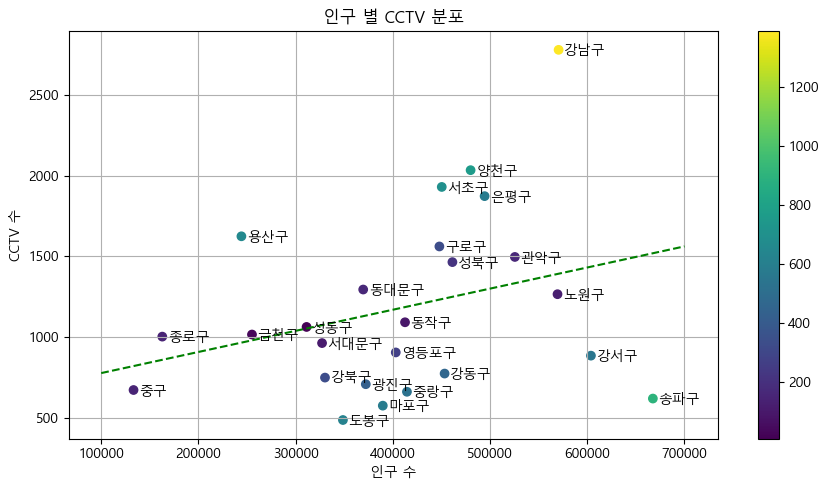

In [106]:
#각 자치구별 회귀선과의 거리
col_bar=[]
for i in range(len(merged_data)):
  temp = abs(d_label[i]-(y+x*d_row[i]))
  col_bar.append(int(temp))


plt.figure(figsize=(9,5))
plt.plot(x_reg, y_reg , '--', color = 'green' )
plt.title('인구 별 CCTV 분포')
plt.xlabel('인구 수')
plt.ylabel('CCTV 수')


scatter = plt.scatter(d_row,d_label, c=col_bar)
plt.colorbar(scatter)
plt.grid()
plt.xlim(min(d_row)*0.5, max(d_row)*1.1)


for i, gu_name in enumerate(merged_data['기관명']):  # 구 이름으로 라벨링
    plt.annotate(gu_name, (d_row[i], d_label[i]), 
                xytext=(4, -4),textcoords='offset points')


plt.tight_layout()
plt.show()

<Figure size 900x500 with 0 Axes>

Text(0.5, 1.0, '인구 별 CCTV 분포')

Text(0.5, 0, '인구 수')

Text(0, 0.5, 'CCTV 수')

(66620.0, 734231.3)

Text(4, -4, '강남구')

Text(4, -4, '송파구')

Text(4, -4, '양천구')

Text(4, -4, '서초구')

Text(4, -4, '용산구')

Text(4, -4, '도봉구')

Text(4, -4, '마포구')

Text(4, -4, '은평구')

Text(4, -4, '강서구')

Text(4, -4, '중랑구')

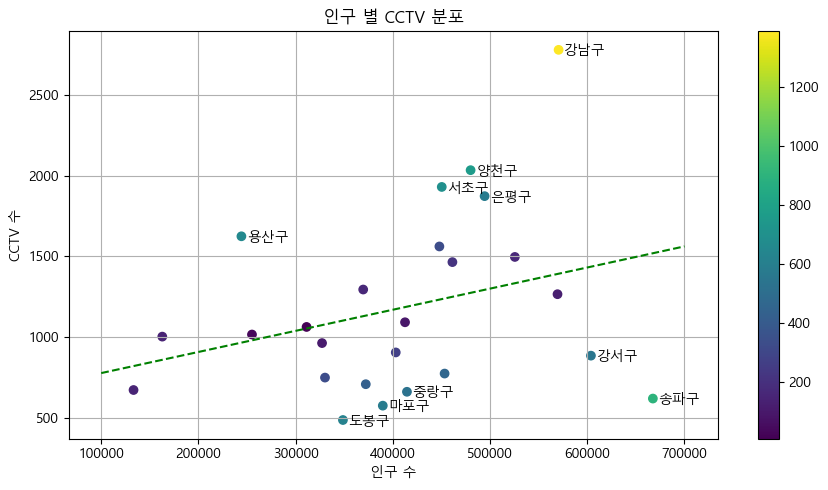

In [203]:
merged_data['컬러바']=col_bar
merged_data = merged_data.sort_values(by='컬러바', ascending=False).reset_index(drop=True)

d_label = merged_data['소계'].tolist()
d_row = merged_data['인구'].tolist()

#회귀선
#기울기, y절편 = np.polyfit(데이터x, 데이터y, 1(차원=직선))
x,y = np.polyfit(d_row,d_label,1) #기울기x, y절편

#회귀선을 그리기위한 x,y값 도출
#회귀선을 그릴때 x축의 최대,최소만 알고있어도 그릴수 있음
#최대,최소값으로 두 점 생성
x_reg = np.array([100000, 700000])
#회귀선 y값 계산 => 기울기*x값 + y절편
y_reg = x*x_reg+y



#각 자치구별 회귀선과의 거리
col_bar=[]
for i in range(len(merged_data)):
  temp = abs(d_label[i]-(y+x*d_row[i]))
  col_bar.append(int(temp))

plt.figure(figsize=(9,5))
plt.plot(x_reg, y_reg , '--', color = 'green' )
plt.title('인구 별 CCTV 분포')
plt.xlabel('인구 수')
plt.ylabel('CCTV 수')


scatter = plt.scatter(d_row,d_label, c=col_bar)
plt.colorbar(scatter)
plt.grid()
plt.xlim(min(d_row)*0.5, max(d_row)*1.1)

#회귀선과의 거리 먼 상위 10개 항목 출력
for i in range(10):
    plt.annotate(merged_data['기관명'][i], (d_row[i], d_label[i]), 
                xytext=(4, -4),textcoords='offset points')

plt.tight_layout()
plt.savefig('./4번_회귀선과 거리 먼 상위10개 지역구 출력')
plt.show()